# Homework 1

In [39]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from IPython.display import Image  

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pydotplus
import seaborn as sns

### Data Preprocess

Question 1: Remove the rows with missing labels (’label’) and rows with more than 7 missing features. Report the remaining number of rows. (2 mark)

In [2]:
# load data
dat = pd.read_csv('data/customer_data.csv')
dat.head()

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
0,0.0,59004779,4.0,1277.0,1.0,113000.0,2.0,8.0,-1.0,100.0,3.0,341759.0,207.173840
1,0.0,58990862,7.0,1298.0,1.0,110000.0,2.0,11.0,-1.0,101.0,5.0,72001.0,NaN
2,1.0,58995168,7.0,1335.5,1.0,151000.0,2.0,11.0,5.0,110.0,3.0,60084.0,NaN
3,0.0,54987320,7.0,NaN,2.0,59000.0,2.0,11.0,5.0,108.0,4.0,450081.0,197.403141
4,0.0,59005995,6.0,1217.0,3.0,56000.0,2.0,6.0,-1.0,100.0,3.0,60091.0,NaN


In [3]:
print('Original Rows: %s' % len(dat))

dat_remove_label = dat.dropna(subset=['label'])
print('after remove NA-label row: %s' % len(dat_remove_label))

dat_remove_7_missing = dat_remove_label.iloc[:, 2:] # drop `label` because it's not a feature
dat_remove_7_missing = dat_remove_7_missing.dropna(thresh=8)
print('after drop more than 7 feature: %s' % len(dat_remove_7_missing))

Original Rows: 1124
after remove NA-label row: 1110
after drop more than 7 feature: 1095


Question 2: Remove features with > 50% of missing values. For other features with missing values fill them with the mean of the corresponding features. Report the removed features (if any) and standard deviation of features with missing values after filling. (2 marks)

In [4]:
print('original columns: %s' % len(dat_remove_7_missing.columns))

dat_remove_50pct = dat_remove_7_missing.dropna(thresh=0.5 * len(dat_remove_7_missing), axis='columns')
dat_fill_mean = dat_remove_50pct.fillna(dat_remove_50pct.mean())
print('columns after remove feature has 50pct missing values: %s' % len(dat_remove_50pct.columns))

for feature in dat_remove_7_missing.columns:
    if feature not in dat_fill_mean.columns:
        print('removed feature --> %s' % feature)

dat_fill_mean.std()

original columns: 11
columns after remove feature has 50pct missing values: 10
removed feature --> fea_11


fea_1          1.378574
fea_2         48.151339
fea_3          0.876765
fea_4      89256.523379
fea_5          0.260353
fea_6          2.676198
fea_7          2.970648
fea_8         11.977444
fea_9          0.857937
fea_10    152455.809399
dtype: float64

### Decision Trees

In [5]:
train_feature = pd.read_csv('data/customer_data_train.csv', index_col=0)
train_label = pd.read_csv('data/customer_data_train_labels.csv', index_col=0)

test_feature = pd.read_csv('data/customer_data_test.csv', index_col=0)
test_label = pd.read_csv('data/customer_data_test_labels.csv', index_col=0)

valid_feature = pd.read_csv('data/customer_data_valid.csv', index_col=0)
valid_label = pd.read_csv('data/customer_data_valid_labels.csv', index_col=0)

valid_feature.head()

,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10
1086,5.0,1304.0,3.0,140000.0,2.0,15.0,5.0,80.0,3.0,151300.0
584,7.0,1325.0,1.0,80000.0,2.0,12.0,-1.0,82.0,3.0,60026.0
475,7.0,1292.0,1.0,130000.0,2.0,11.0,5.0,108.0,3.0,60040.0
999,4.0,1224.5,3.0,59000.0,2.0,8.0,5.0,80.0,3.0,60044.0
900,5.0,1229.0,3.0,46000.0,2.0,15.0,-1.0,111.0,4.0,450071.0


In [6]:
criterions = ['gini', 'entropy']
min_split = [2, 5, 10, 20]
samples_cut = [50, 100, 200, 400, 600, 704]

Question 3: Train Decision Tree model on train data for criterions = {’gini’, ’entropy’} and report the accuracies on the validation data. Select the best criterion and report the accuracy on the test data. (1 mark)

In [7]:
bestAcc = 0
bestCri = ''

for cri in criterions:
    
    clf = DecisionTreeClassifier(criterion=cri, random_state=34)
    clf.fit(train_feature, train_label)
    predictions = clf.predict(test_feature)
    accuracy = accuracy_score(test_label, predictions)

    if accuracy > bestAcc:
        bestAcc = accuracy
        bestCri = cri

print(f'The best criterion is {bestCri} and the accuracy is {bestAcc}')
    

The best criterion is entropy and the accuracy is 0.7194570135746606


Question 4: Use the criterion selected above to train Decision Tree model on train data for min samples split={2,5,10,20} and report the accuracies on the validation data. Select the best parameter and report the accuracy on the test data. (2 marks)

In [8]:
bestAcc = 0
bestMinSplit = 0

for minsplit in min_split:
    
    clf = DecisionTreeClassifier(criterion='entropy', min_samples_split=minsplit, random_state=34)
    clf.fit(train_feature, train_label)
    predictions = clf.predict(test_feature)
    accuracy = accuracy_score(test_label, predictions)

    if accuracy > bestAcc:
        bestAcc = accuracy
        bestMinSplit = minsplit

print(f'The best min split is {bestMinSplit} and the accuracy is {bestAcc}')

The best min split is 20 and the accuracy is 0.7330316742081447


Question 5: Use the parameters selected above (Q4 and Q5) to train Decision Tree model using the first 50, 100, 200, 400, 600 and 704 samples from train data. Keep the validation set unchanged during this analysis. Report and plot the accuracies on the validation data. (2 marks)

The best cut is 100 and the accuracy is 0.7613636363636364


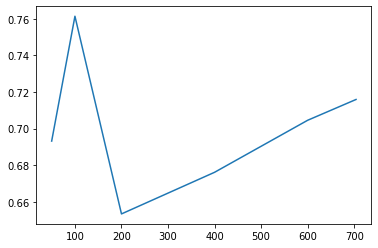

In [9]:
bestAcc = 0
bestCut = 0
bestClf = 0

acc = []

for cut in samples_cut:

    clf = DecisionTreeClassifier(criterion='entropy', min_samples_split=20, random_state=34)
    clf.fit(train_feature[:cut], train_label[:cut])
    predictions = clf.predict(valid_feature)
    accuracy = accuracy_score(valid_label, predictions)

    acc.append(accuracy)

    if accuracy > bestAcc:
        bestAcc = accuracy
        bestCut = cut
        bestClf = clf

print(f'The best cut is {bestCut} and the accuracy is {bestAcc}')

# plt.figure(figsize=(60,30))
# plot_tree(bestClf, filled=True)

x = samples_cut
y = acc
plt.plot(x, y)
plt.show()


Question 6: Use the test data to compute the confusion matrix for the predictions of your model. Report the confusion matrix. (1 mark)

In [10]:
bestClf.fit(train_feature[:bestCut], train_label[:bestCut])
pred = bestClf.predict(test_feature)
real = test_label

print(confusion_matrix(real, pred))

[[149  25]
 [ 35  12]]


### Nearest Neighbor
Normalize Data: Normalize features such that for each feature the mean is 0 and the standard deviation is 1 in the train+validation data. Use the normalizing factors calculated on train+validation data to modify the values in train, validation and test data.

In [11]:
# normalize data
dataTrainVaild = pd.concat([train_feature, valid_feature])

XTrain = (train_feature - dataTrainVaild.mean() / dataTrainVaild.std())
XVaild = (valid_feature - dataTrainVaild.mean() / dataTrainVaild.std())
XTest = (test_feature - dataTrainVaild.mean() / dataTrainVaild.std())

Question 7: Train k-nn model on train + validation data and report accuracy on test data. Use Euclidean distance and k=3. (1 mark)

In [32]:
XTrainVaild = pd.concat([XTrain, XVaild])
YTrainVaild = pd.concat([train_label, valid_label])

k = 3
clf = KNeighborsClassifier(k, p=2)
clf.fit(XTrainVaild, YTrainVaild.squeeze())
predictions = clf.predict(XTest)
accuracy = np.sum((predictions == test_label.squeeze()) / (len(test_label.squeeze()))) # must use pd.Series

print(f'accuracy = {accuracy} for test data')

accuracy = 0.751131221719457 for test data


Question 8: Train the model on train data for distance metrics defined by $l_1$,$l_{inf}$, $l_2$. Report the accuracies on the validation data. Select the best metric and report the accuracy on the test data for the selected metric. Use k=3. (1 mark)

In [31]:
pList = [1, np.inf, 2]
k = 3

bestP = 0
bestAcc = 0

for i in pList:

    clf = KNeighborsClassifier(k, p=i)
    clf.fit(XTrain, train_label.squeeze())
    predictions = clf.predict(XVaild)
    accuracy = np.sum((predictions == valid_label.squeeze()) / (len(valid_label.squeeze()))) # must use pd.Series

    if accuracy > bestAcc:
        bestAcc = accuracy
        bestP = i

print(f'The best accuracy is {bestAcc} when p = {bestP}')

The best accuracy is 0.7556818181818183 when p = 2


Question 9: Train the k-nn model on train data for k=1,3,5,7,9. Report and plot the accuracies on the validation data. Select the best ’k’ value and report the accuracy on the test data for the selected ’k’. Use Chebyshev distance. (2 marks)

0.7045454545454547
0.7386363636363638
0.7670454545454547
0.7840909090909093
0.7840909090909093
The best accuracy is 0.7840909090909093 when k = 7


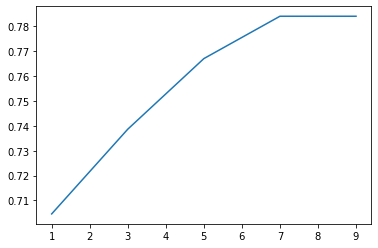

In [67]:
kList = [1, 3, 5, 7, 9]
accList = []

bestK = 0
bestAcc = 0

for k in kList:

    clf = KNeighborsClassifier(n_neighbors=k, p=np.inf)
    clf.fit(XTrain, train_label.squeeze())
    predictions = clf.predict(XVaild)
    accuracy = np.sum((predictions == valid_label.squeeze()) / (len(valid_label.squeeze()))) # must use pd.Series

    accList.append(accuracy)

    if accuracy > bestAcc:
        bestAcc = accuracy
        bestK = k

print(f'The best accuracy is {bestAcc} when k = {bestK}')

x = kList
y = accList
plt.plot(x, y)
plt.show()


Question 10: Instead of using full train data, train the model using the first 50, 100, 200, 400, 600 and 704 data samples from train data. Keep the validation set unchanged during this analysis. Report and plot the accuracies on the validation data. Use Chebyshev distance and k=3. Note: Don’t shuffle the data and use only the ’first n samples’, otherwise your answers may differ. (2 marks)

The best accuracy is 0.7727272727272729 when cut = 100


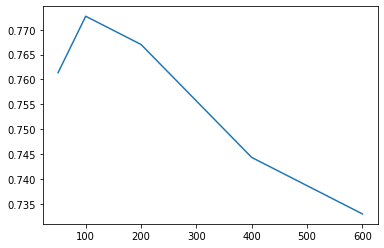

In [36]:
cutList = [50, 100, 200, 400, 600]
accList = []

bestCut = 0
bestAcc = 0

for cut in cutList:

    k = 3
    clf = KNeighborsClassifier(k, p=np.inf)
    clf.fit(XTrain[:cut], train_label.squeeze()[:cut])
    predictions = clf.predict(XVaild)
    accuracy = np.sum((predictions == valid_label.squeeze()) / (len(valid_label.squeeze()))) # must use pd.Series

    accList.append(accuracy)

    if accuracy > bestAcc:
        bestAcc = accuracy
        bestCut= cut

print(f'The best accuracy is {bestAcc} when cut = {bestCut}')

x = cutList
y = accList
plt.plot(x, y)
plt.show()

Question 11: Train a k-nn model with k=3 and k=7 with the Chebyshev distance on the train and validation data combined. Plot the ROC curve for the prediction you get on the test data for both models. Also report the accuracy, precision, recall and F-1 score.
Please comment on the evaluation results and the ROC curve, which model is better?(4 points)

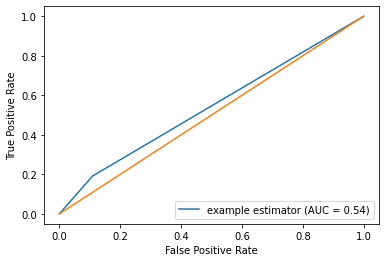

accuracy = 0.7420814479638009, precision = 0.32142857142857145, recall = 0.19148936170212766, F-1 score = 0.24, given k = 3


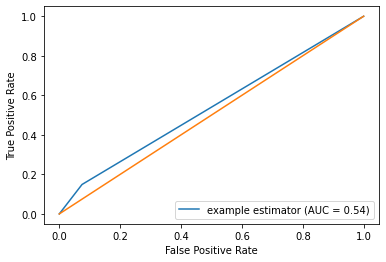

accuracy = 0.7601809954751131, precision = 0.35, recall = 0.14893617021276595, F-1 score = 0.208955223880597, given k = 7


In [69]:
kList = [3, 7]
predictionList = []

for k in kList:

    clf = KNeighborsClassifier(n_neighbors=k, p=np.inf)
    clf.fit(XTrainVaild, YTrainVaild.squeeze())
    predictions = clf.predict(XTest)
    predictionList.append(predictions)
    accuracy = np.sum((predictions == test_label.squeeze()) / (len(test_label.squeeze()))) # must use pd.Series
    # accuracy = clf.score(XTest, test_label)

    # plot ROC curve
    fpr, tpr, threshold = metrics.roc_curve(test_label, predictions)
    rocAuc = metrics.auc(fpr, tpr)
    xBenchmark, yBenchmark = np.linspace(0, 1, 10), np.linspace(0, 1, 10)
    display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=rocAuc, estimator_name='example estimator')
    display.plot()
    plt.plot(xBenchmark, yBenchmark)
    plt.show()

    # report precision, recall, F-1 
    precision = metrics.precision_score(test_label, predictions)
    recall = metrics.recall_score(test_label, predictions)
    f1Score = metrics.f1_score(test_label, predictions)

    print(f'accuracy = {accuracy}, precision = {precision}, recall = {recall}, F-1 score = {f1Score}, given k = {k}')

    

Base on the evaluations we can see that the AUC(area under curve) are almost the same. But model 2 has a higher accuracy, precision, and F-1 score. Model 2 is slightly better. 